#### Mempersiapkan Library

In [1]:
import pandas as pd
import numpy as np
import csv
import re
from string import punctuation
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

#### Mempersiapkan Dataset

In [2]:
tsv_file_path = "train_preprocess.tsv.txt"

data_text = []
label = []

with open(tsv_file_path, encoding='utf-8') as tsvfile:
    tsv_reader = csv.reader(tsvfile, delimiter='\t')
    for row in tsv_reader:
        data_text.append(row[0])
        label.append(row[1])

df = pd.DataFrame({'data_text': data_text, 'label': label})

In [3]:
df

,data_text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [4]:
df['len_data_text'] = df['data_text'].apply(lambda x: len(x.split()))

In [5]:
df

,data_text,label,len_data_text
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38
...,...,...,...
10995,tidak kecewa,positive,2
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,26
10997,hormati partai-partai yang telah berkoalisi,neutral,5
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,13


In [6]:
df.loc[df['len_data_text'] <= 3]

,data_text,label,len_data_text
9,bersyukur,positive,1
46,tidak memuaskan,negative,2
69,marah,negative,1
180,mengagumi,positive,1
181,tidak hebat,negative,2
...,...,...,...
10927,tidak indah,negative,2
10943,puas,positive,1
10972,tidak jahat,positive,2
10994,tidak bosan,positive,2


In [7]:
df = df.drop(df.index[df['len_data_text'] <= 10], axis=0)

In [8]:
df.loc[df['len_data_text'] <= 11]

,data_text,label,len_data_text
62,"jangan terlalu banyak iklan , perbaiki dulu ja...",negative,11
98,"hasil quick count pilgub kaltim 2018 , isran -...",neutral,11
118,cha-cha itu makanan ringan terenak dan tepat b...,positive,11
122,fadli zon anjing kau . tidak usah kau sok polos .,negative,11
345,"usung dedi mulyadii , golkar rayu pdip , demok...",neutral,11
...,...,...,...
10706,pagi ini lagi marah sama indosat karena kuota ...,negative,11
10789,tim sukses asik masih tunggu hasil resmi kpu j...,neutral,11
10821,tidak untung saya ikut romobongan untuk pergi ...,negative,11
10850,nyesel deh ganti mending yang kemarin deh indi...,negative,11


In [9]:
df

,data_text,label,len_data_text
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38
...,...,...,...
10989,tadinya pengin mengantar teman dari kalau ke r...,negative,49
10990,datang ke sini sore hari pakai baju agak tebal...,positive,23
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,26
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,13


In [10]:
train_data, test_data = train_test_split(df, test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.2)

In [11]:
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(5968, 3)
(1866, 3)
(1492, 3)


In [12]:
print('Komposisi Label train_data:')
print(train_data['label'].value_counts())

print('Komposisi Label test_data:')
print(test_data['label'].value_counts())

print('Komposisi Label val_data:')
print(val_data['label'].value_counts())

Komposisi Label train_data:
positive    3812
negative    1693
neutral      463
Name: label, dtype: int64
Komposisi Label test_data:
positive    1197
negative     526
neutral      143
Name: label, dtype: int64
Komposisi Label val_data:
positive    986
negative    404
neutral     102
Name: label, dtype: int64


#### Normalisasi Text

In [13]:
def lowercasing(paragraph):
    return paragraph.lower()

In [14]:
def menghilangkan_tandabaca(paragraph):
    new_paragraph = re.sub(fr'[{punctuation}]', r'', paragraph)
    return new_paragraph

In [15]:
def text_normalization(paragraph):
    paragraph = lowercasing(paragraph)
    paragraph = menghilangkan_tandabaca(paragraph)
    paragraph = re.sub(r"[ ]+",r' ',paragraph)
    return paragraph

In [16]:
train_data['data_text'] = train_data['data_text'].apply(lambda x: text_normalization(x))
test_data['data_text'] = test_data['data_text'].apply(lambda x: text_normalization(x))
val_data['data_text'] = val_data['data_text'].apply(lambda x: text_normalization(x))

#### Training Model

In [17]:
tokenizer = Tokenizer(oov_token='<UNK>')

In [18]:
tokenizer.fit_on_texts(train_data['data_text'])

In [19]:
train_data_tf = tokenizer.texts_to_sequences(train_data['data_text'])
test_data_tf = tokenizer.texts_to_sequences(test_data['data_text'])
val_data_tf = tokenizer.texts_to_sequences(val_data['data_text'])

In [20]:
train_data_tf

[[6,
  233,
  41,
  73,
  365,
  195,
  722,
  77,
  8,
  890,
  161,
  13,
  1186,
  41,
  39,
  210,
  15,
  109,
  6744,
  1347,
  5,
  21,
  183,
  5,
  1295,
  45,
  64,
  406,
  13,
  506,
  49,
  3,
  618,
  99,
  70,
  22,
  4,
  133,
  203,
  2,
  230,
  20,
  966,
  536,
  35,
  249,
  15,
  6,
  2465,
  4775,
  1348,
  85,
  3,
  176,
  127,
  6,
  5,
  21,
  2466,
  195,
  722,
  45,
  77,
  3,
  6,
  1476],
 [211,
  5,
  89,
  1349,
  30,
  438,
  444,
  75,
  174,
  5,
  108,
  1349,
  9,
  203,
  272,
  7,
  17,
  937,
  44,
  146,
  1477,
  2,
  132,
  250,
  386,
  82,
  50],
 [517,
  16,
  21,
  105,
  138,
  307,
  2,
  12,
  24,
  29,
  7,
  101,
  756,
  3,
  110,
  240,
  599,
  231,
  79,
  68,
  227,
  1882,
  4,
  681,
  104,
  196,
  15,
  12,
  118,
  58,
  864,
  6745,
  967,
  2,
  19,
  599,
  231,
  565,
  69,
  79,
  250,
  386,
  82,
  529,
  661,
  188],
 [33,
  550,
  11,
  244,
  289,
  129,
  4,
  74,
  187,
  40,
  6,
  5,
  1883,
  35,
  104,
  55

In [21]:
train_data['data_text']

4186     saya memilih malam hari mengunjungi the valley...
9483     terletak di dalam gang kalau menggunakan mobil...
6734     tiap ke sini selalu memesan bubur nya enak ban...
2258     restoran padang ini terkenal sejak dulu dan sa...
10392    makan ke sana dengan pasangan di malam hari da...
                               ...                        
10800    sebetulnya sudah tidak tepat jika memakai kata...
317      anis sandi menang ahok dipenjara megawati stro...
1680     restoran berkonsep kafe yang menjual layanan d...
9227     kampung daun menyajikan suasana yang berbeda d...
8164     dulu waktu saya kuliah di bandung resto ini ad...
Name: data_text, Length: 5968, dtype: object

In [22]:
train_data_tf[0]

[6,
 233,
 41,
 73,
 365,
 195,
 722,
 77,
 8,
 890,
 161,
 13,
 1186,
 41,
 39,
 210,
 15,
 109,
 6744,
 1347,
 5,
 21,
 183,
 5,
 1295,
 45,
 64,
 406,
 13,
 506,
 49,
 3,
 618,
 99,
 70,
 22,
 4,
 133,
 203,
 2,
 230,
 20,
 966,
 536,
 35,
 249,
 15,
 6,
 2465,
 4775,
 1348,
 85,
 3,
 176,
 127,
 6,
 5,
 21,
 2466,
 195,
 722,
 45,
 77,
 3,
 6,
 1476]

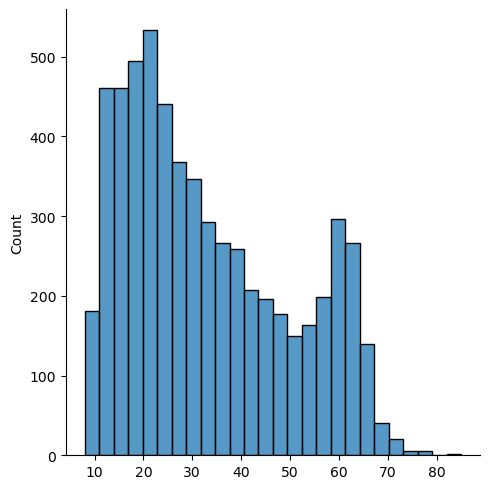

In [23]:
sns.displot([len(x) for x in train_data_tf])

In [24]:
max_len = int(np.quantile([len(x) for x in train_data_tf], 0.9))

In [25]:
max_len

60

In [26]:
train_padded = pad_sequences(sequences = train_data_tf, padding='post', maxlen=max_len)
test_padded = pad_sequences(sequences = test_data_tf, padding='post', maxlen=max_len)
val_padded = pad_sequences(sequences = val_data_tf, padding='post', maxlen=max_len)

In [27]:
print(train_padded.shape)
print(test_padded.shape)
print(val_padded.shape)

(5968, 60)
(1866, 60)
(1492, 60)


In [28]:
onehot = OneHotEncoder()

In [29]:
onehot.fit_transform(train_data[['label']])

<5968x3 sparse matrix of type '<class 'numpy.float64'>'
	with 5968 stored elements in Compressed Sparse Row format>

In [30]:
train_labels = onehot.fit_transform(train_data[['label']]).toarray()

#### Model Testing and Evaluation

In [31]:
model = Sequential()

In [32]:
max_features = len(tokenizer.index_word)
batch_size=16
output_dim = 64
input_len = max_len

In [33]:
input_len

60

In [34]:
model = Sequential()
model.add(layers.Embedding(input_dim=len(tokenizer.index_word),
                           output_dim=output_dim, 
                           input_length=input_len))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [36]:
maximum_index_training = int(np.floor(train_padded.shape[0]/batch_size)*batch_size)
model.fit(x=train_padded[:maximum_index_training], 
          y=train_labels[:maximum_index_training],
          batch_size=batch_size, 
          epochs=20, 
          shuffle=False)

Epoch 1/20
371/373 [============================>.] - ETA: 0s - loss: 0.5081 - accuracy: 0.7903

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/embedding/embedding_lookup' defined at (most recent call last):
    File "C:\Users\brain\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\brain\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\brain\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\brain\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\brain\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\brain\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\brain\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\brain\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\brain\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\brain\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\brain\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\brain\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\brain\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\brain\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\brain\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\brain\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\brain\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\brain\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\brain\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\brain\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\brain\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\brain\AppData\Local\Temp\ipykernel_16304\526802547.py", line 2, in <module>
      model.fit(x=train_padded[:maximum_index_training],
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\brain\anaconda3\lib\site-packages\keras\layers\core\embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_1/embedding/embedding_lookup'
indices[15,59] = 13604 is not in [0, 13604)
	 [[{{node sequential_1/embedding/embedding_lookup}}]] [Op:__inference_train_function_1215]